# Correlation Analysis

This notebook checks for redundancy and correlations within the dataset. Redundancy is related to high correlation.

In [1]:
# Libraries
library(ggplot2)
library(reshape2)
library(repr)
library(rpart)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'reshape2' was built under R version 3.3.3"Warning message:
"package 'repr' was built under R version 3.3.3"

In [2]:
# 00. Acquire the Data Set
bostonURL <- url("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
boston <- read.table(bostonURL)
colnames(boston) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV")

### Checking for Redundancy

The following is a function that checks for redundancy by dropping a feature and seeing if the other features can predict it.

In [3]:
# Function from Professor
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
   
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    return (mean(scores))
}

In [4]:
for(feature in colnames(boston)) {
    print(paste(feature, ": ", mean_r2_for_feature(boston, feature)))
}

[1] "CRIM :  0.375495007146776"
[1] "ZN :  0.800425352734554"
[1] "INDUS :  0.864773298095658"
[1] "CHAS :  -0.039851864056741"
[1] "NOX :  0.819872775326384"
[1] "RM :  0.510923510600967"
[1] "AGE :  0.693718836672126"
[1] "DIS :  0.805152443488746"
[1] "RAD :  0.896239950820025"
[1] "TAX :  0.905831412140661"
[1] "PTRATIO :  0.800283243007872"
[1] "B :  0.164326772297279"
[1] "LSTAT :  0.695765427621075"
[1] "MEDV :  0.717640277679972"


Many of these features are redundant. This includes: ZN, INDUS,NOX, DIS, RAD, TAX, PTRATIO. 

### Checking for Correlations

In [5]:
# Correlation Matrix
bostonCor <- cor(boston)
bostonCor[lower.tri(bostonCor)] <- NA

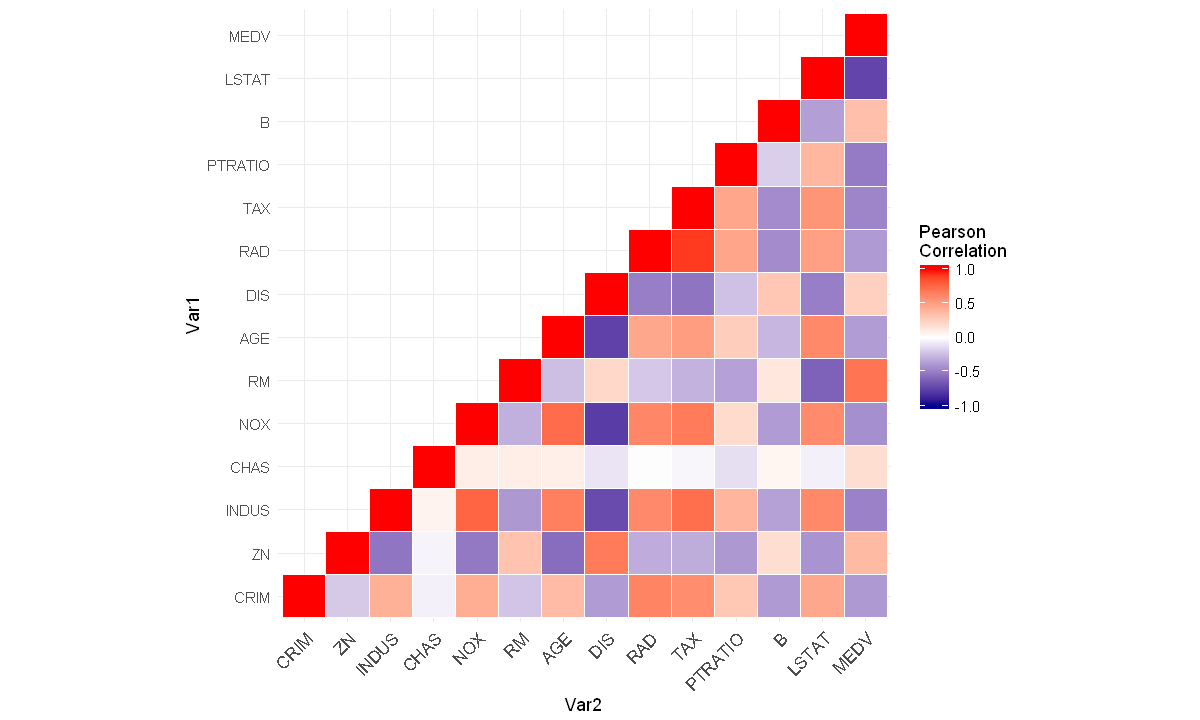

In [6]:
# Heatmap
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(melt(bostonCor, na.rm = TRUE), aes(Var2, Var1, fill = value)) +
    geom_tile(color = "white") +
    scale_fill_gradient2(low = "dark blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1), name="Pearson\nCorrelation") +
    theme_minimal() + 
    theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 10, hjust = 1)) +
    coord_fixed()

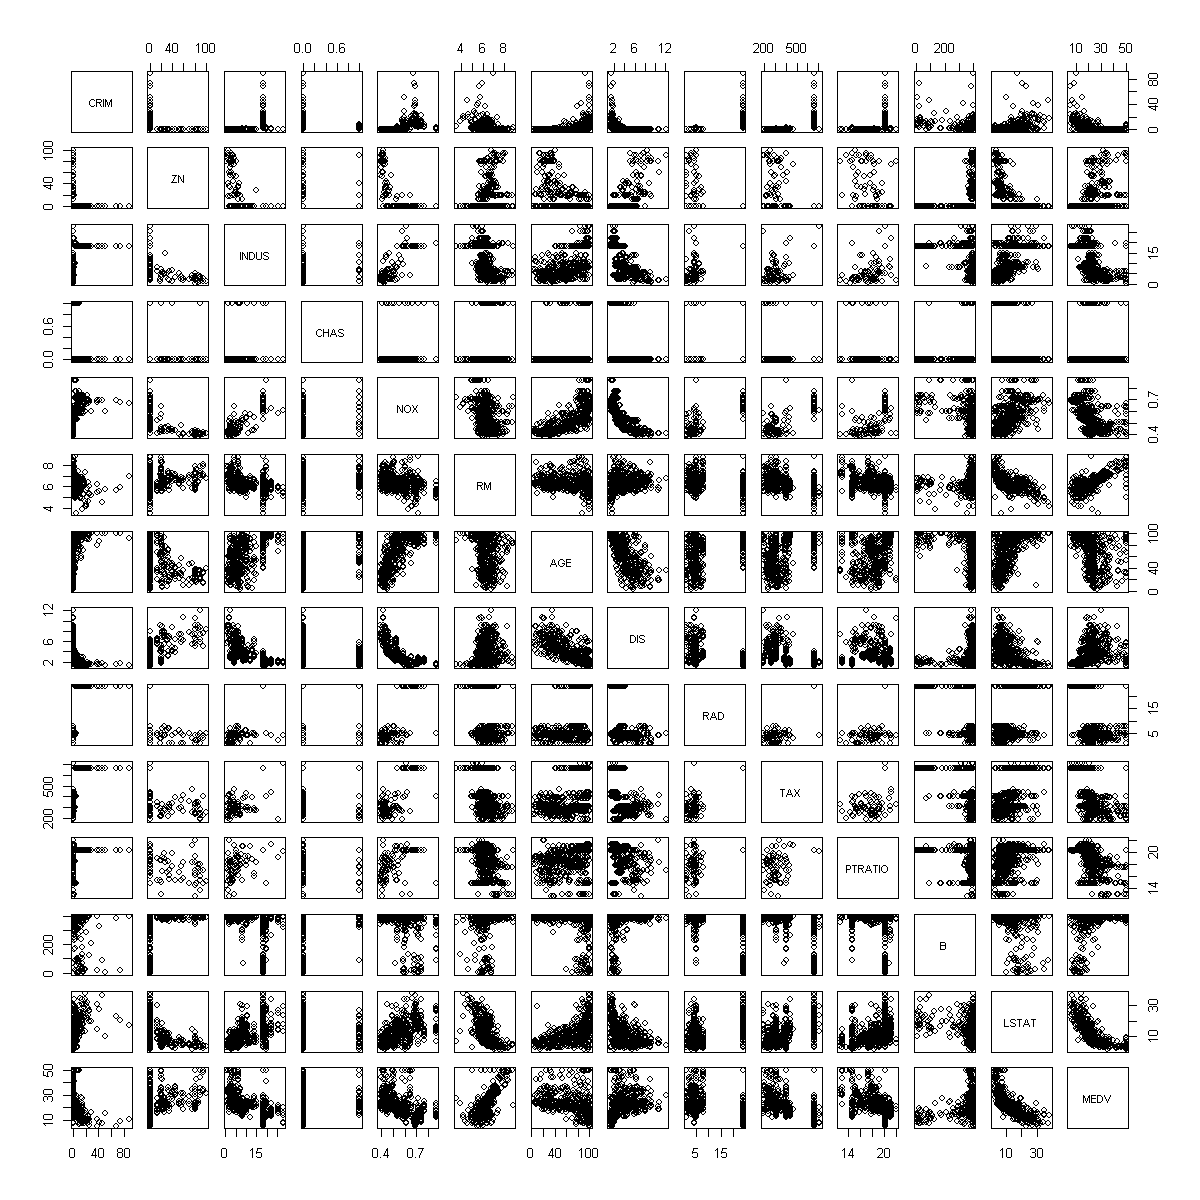

In [7]:
# Pairs Plot
options(repr.plot.width = 10, repr.plot.height = 10)
pairs(boston)

You can see the correlations in the pairs plot. If the points seem to increase, then there is a positive correlation. If the points seem to decrease, then there is a negative correlation. If the points seem random, then there is no correlation. If the points are in columns in weird locations, you're most likely comparing factors.